In [1]:

library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')

source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

Run citation('hdp') for citation instructions,
    and file.show(system.file('LICENSE', package='hdp')) for license details.


### Some analysis of the dataframe to get familiar

In [2]:
df_final <- read.table("../../../data/updated_dataset/final_clustering.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$X
df_final <- df_final[,-1:-3]
df_modif_final <- read.table("../../../data/updated_dataset/modif_final.csv",sep = ',' , header = T)
rownames(df_modif_final)<- df_modif_final$X
df_modif_final <- df_modif_final[,-1:-3]

In [3]:
tail(df_modif_final)

,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,CBL,CDKN2A,CEBPA_bi,CEBPA_mono,CNTN5,CREBBP,CSF1R,CSF3R,CTCF,CUL2,CUX1,DNMT3A,EED,ETV6,EZH2,FBXW7,FLT3_ITD,FLT3_TKD,FLT3_other,GATA1,GATA2,GNAS,GNB1,IDH1,IDH2_p.R140,IDH2_p.R172,JAK2,JAK3,KANSL1,KDM6A,KIT,KMT2C,KMT2D,KMT2E,KRAS,LUC7L2,MED12,MLL,MPL,MYC,NF1,NFE2,NOTCH1,NPM1,NRAS_other,NRAS_p.G12_13,NRAS_p.Q61_62,PDS5B,PHF6,PPFIA2,PRPF8,PTEN,PTPN11,PTPRF,PTPRT,RAD21,RIT1,RUNX1,S100B,SETBP1,SF1,SF3B1,SMC1A,SMC3,SMG1,SPP1,SRSF2,STAG2,STAT5B,SUZ12,TET2,TP53,U2AF1,WT1,ZRSR2,add_8,add_11,add_13,add_21,add_22,del_20,del_3,del_5,del_7,del_9,del_12,del_13,del_16,del_17,del_18,del_x_y,t_v_11,inv_16,t_8_21,complex
2420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1
2423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
2426,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1


In [4]:
dim(df_modif_final)

[1] 2150  103

### Clustering HDP

## LETS WORK ON THE GRIDSEARCH

### Base Distribution Functions

In [5]:
###Binomial
num_cols = ncol(df_modif_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_modif_final,bin))
gaussian <- unlist(sapply(df_modif_final,normal))
pois <- as.numeric(unlist(sapply(df_modif_final,poisson)))
unif <- unlist(sapply(df_modif_final,equally))
repetition <- unlist(sapply(df_modif_final,repet))
lists<- list(binomial,gaussian,unif,repetition)
for (lis in lists) {
    initialise_hdp_yanis(data=df_modif_final,alphaa=1,alphab=1,hh=lis)
}

Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!


In [6]:
# define gridsearch function
test_assignment <- function(x, dd_predicted, components_sd){
    if(x['second_predicted_component']%in%dd_predicted$predicted_component) {
        return( x['max_proba'] > x['second_max_proba']+components_sd[[x['second_predicted_component']+1]])
    }
    else {return(TRUE)} 
}
hdp_gridsearch_yanis <- function( data, posterior_samples, initial_clusters, burnin, chains, space, base_dist, alphaa, alphab){  #+3 components

    result_table <- data.frame('chains' = integer(),
                              'inicc' = integer(),
                              'n' = integer(),
                              'burnin' = integer(),
                              'space' = integer(),
                              'base_dist' = character(), 
                              'alphaa' = integer(),
                              'alphab' = integer(),
                              'n_components' = integer(),
                              'component_0' = integer(),
                              'assignment' = numeric(),
                              'Davies_Bouldin' =numeric(),
                              'Silhouette' = numeric(),stringsAsFactors=FALSE)
    
    
    for (a in chains) {
        for (b in initial_clusters) {
            for (c in posterior_samples) {
                for (d in burnin) {
                    for (e in space) {
                        for (f in base_dist){
                            for (g in alphaa){
                                for (h in alphab){
                                    str <-""
                                    if (f[1] == binomial[1]){
                                        str <-"binomial"
                                    } else if (f[1] == gaussian[1]){
                                        str <-"gaussian"
                                    } else if(f[1] == unif[1]){
                                        str <-"uniform"
                                    } else{
                                        str <-"repetition"
                                    }
                                    cat(sprintf('### %d chains | %d initial clusters | %d posterior samples | %d burn-in | %d space ###\n', a, b, c, d, e))
                                    flush.console()

                                    number_of_chains <- a
                                    chain_list <- vector('list', number_of_chains)
                                    hdp <- initialise_hdp_yanis(data=data,alphaa=g,alphab=h,hh=f)
                                    for (i in 1:number_of_chains) {
                                        seed <- i * 100

                                        activated_hdp <- dp_activate(hdp,
                                            dpindex = 1:numdp(hdp), # indices of the DP to activate: we choose all DP (1, ..., n + 1)
                                            initcc  = b,           # number of starting clusters (every data item is randomly assigned to a cluster to start with)
                                            seed    = seed)

                                        hdp_output <- hdp_posterior(activated_hdp,
                                            burnin = d, # number of burn-in iterations
                                            n      = c,      # number of posterior samples to collect
                                            space  = e,  # number of iterations between collected samples
                                            # cpiter = 1,    # The number of iterations of concentration parameter sampling to perform after each iteration.
                                            seed   = seed)

                                        chain_list[[i]] <- hdp_output

                                    }

                                    multi_output <- hdp_multi_chain(chain_list)
                                    multi_output <- hdp_extract_components(multi_output)


                                    dd_predicted <- data.frame(comp_dp_distn(multi_output)$mean[-1,])

                                    # change categories colnames
                                    colnames(dd_predicted) <- paste0('component_', 0:(ncol(dd_predicted)-1))
                                    components_colnames <- colnames(dd_predicted)

                                    # evaluate for each row the predicted component
                                    dd_predicted['predicted_component'] <- apply(dd_predicted, 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(which.max(x)-1)
                                                                                                })




                                    # evaluate for each row the maximum probability associated to the predicted component
                                    dd_predicted['max_proba'] <- apply(dd_predicted[,components_colnames], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(max(x))})


                                    # get second predicted component
                                    n_components <- ncol(dd_predicted) - 2 - 1 # without columns 'component_0', 'predicted_component' and 'max_proba'

                                    dd_predicted['second_max_proba'] <- apply(dd_predicted[,0:n_components + 1], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(sort(x,partial=n_components)[n_components])})

                                    dd_predicted['second_predicted_component'] <- apply(dd_predicted, 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(which(x==x['second_max_proba'])[1]-1)})



                                    # get standard deviations of components
                                    components_sd <- list()
                                    for( j in as.integer(levels(factor(dd_predicted$predicted_component)))){
                                        if(! is.na(j)){
                                            components_sd[[j+1]] <- sd(dd_predicted$max_proba[!is.na(dd_predicted$predicted_component) & dd_predicted$predicted_component == j])
                                        }
                                    }


                                    # determine which patients are well assigned
                                    dd_predicted['assignment'] <- apply(dd_predicted[, c('max_proba', 'second_max_proba','second_predicted_component')], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(test_assignment(x, dd_predicted, components_sd))})

                                    # validation indexes
                                    traj <- data.frame(data[rowSums(data) !=0,])
                                    traj <- as.matrix(apply(traj, 2, function (x){as.numeric(x)}))
                                    part <- as.integer(dd_predicted$predicted_component[!is.na(dd_predicted$predicted_component)])
                                    intIdx <- intCriteria(traj, part, c("Davies_bouldin","Silhouette"))

                                    # result
                                    result_table[nrow(result_table)+1,] <- c(a, b, c, d, e, str, g, h, numcomp(multi_output), nrow(dd_predicted[!is.na(dd_predicted$predicted_component) &dd_predicted$predicted_component==0,]), nrow(dd_predicted[!is.na(dd_predicted$assignment) & dd_predicted$assignment==TRUE,]),intIdx$davies_bouldin,intIdx$silhouette)

                                    cat('Done!\n')
                                    flush.console()
                                }
                            }
                        }
                    }
                }
            }
        }
    }
    
    return(result_table)

}

In [7]:
# initialize the range of parameters used for the grid search
data <- df_modif_final
posterior_samples <- c(350,400)
initial_clusters <- c(13,15)
burnin <- 7000
chains <- 3
space <- 20
base_dist <- list(gaussian,unif)
alphaa <-c(1,2)
alphab <-c(0.5,1)

In [8]:
res <- hdp_gridsearch_yanis(data, posterior_samples, initial_clusters, burnin, chains, space,base_dist,alphaa,alphab)
res

### 3 chains | 13 initial clusters | 350 posterior samples | 7000 burn-in | 20 space ###
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
[1] "7000 burn-in iterations in 0.4 mins"
[1] "7000 burn-in iterations in 0.4 mins"
[1] "7000 burn-in iterations in 0.4 mins"
Done!
### 3 chains | 13 initial clusters | 350 posterior samples | 7000 burn-in | 20 space ###
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
[1] "7000 burn-in iterations in 0.4 mins"
[1] "7000 burn-in iterations in 0.4 mins"
[1] "7000 burn-in iterations in 0.3 mins"
Done!
### 3 chains | 13 initial clusters | 350 posterior samples | 7000 burn-in | 20 space ###
Initialise HDP on a 2150 x 103 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes..

chains,inicc,n,burnin,space,base_dist,alphaa,alphab,n_components,component_0,assignment,Davies_Bouldin,Silhouette
3,13,350,7000,20,gaussian,1,0.5,5,748,1933,2.81581493754502,0.109394125636634
3,13,350,7000,20,gaussian,1,1,7,5,1894,2.83665052402728,0.0842047350299731
3,13,350,7000,20,gaussian,2,0.5,10,48,1806,3.08680392924717,0.084883291480619
3,13,350,7000,20,gaussian,2,1,7,68,1812,3.32845550750996,0.0745127325418023
3,13,350,7000,20,uniform,1,0.5,8,5,1828,2.73504477149684,NaN
3,13,350,7000,20,uniform,1,1,9,3,1844,2.54397321340756,NaN
3,13,350,7000,20,uniform,2,0.5,8,2,1831,2.77430343809017,0.0703888413313802
3,13,350,7000,20,uniform,2,1,7,64,1834,2.74748180503752,NaN
3,13,400,7000,20,gaussian,1,0.5,5,746,1931,2.8173958562477,0.109745036057182
3,13,400,7000,20,gaussian,1,1,7,5,1896,2.83486605782936,0.0835161625877024


In [11]:
write.table(res,'hdp_gridsearch_modif.tsv',sep='\t',quote=F)

In [ ]:
# define gridsearch function
test_assignment <- function(x, dd_predicted, components_sd){
    if(x['second_predicted_component']%in%dd_predicted$predicted_component) {
        return( x['max_proba'] > x['second_max_proba']+components_sd[[x['second_predicted_component']+1]])
    }
    else {return(TRUE)} 
}
hdp_gridsearch_yanis <- function( data, posterior_samples, initial_clusters, burnin, chains, space, base_dist, alphaa, alphab){  #+3 components

    result_table <- data.frame('chains' = integer(),
                              'inicc' = integer(),
                              'n' = integer(),
                              'burnin' = integer(),
                              'space' = integer(),
                              'n_components' = integer(),
                              'component_0' = integer(),
                              'assignment' = numeric(),
                              'Davies_Bouldin' =numeric(),
                              'Silhouette' = numeric())
    
    
    for (a in chains) {
        for (b in initial_clusters) {
            for (c in posterior_samples) {
                for (d in burnin) {
                    for (e in space) {
                        for (f in base_dist){
                            for (g in alphaa){
                                for (h in alphab){
                                    if 
                                    cat(sprintf('### %d chains | %d initial clusters | %d posterior samples | %d burn-in | %d space ###\n', a, b, c, d, e))
                                    flush.console()

                                    number_of_chains <- a
                                    chain_list <- vector('list', number_of_chains)
                                    hdp <- initialise_hdp_yanis(data=data,alphaa=g,alphab=h,hh=f)
                                    for (i in 1:number_of_chains) {
                                        seed <- i * 100

                                        activated_hdp <- dp_activate(hdp,
                                            dpindex = 1:numdp(hdp), # indices of the DP to activate: we choose all DP (1, ..., n + 1)
                                            initcc  = b,           # number of starting clusters (every data item is randomly assigned to a cluster to start with)
                                            seed    = seed)

                                        hdp_output <- hdp_posterior(activated_hdp,
                                            burnin = d, # number of burn-in iterations
                                            n      = c,      # number of posterior samples to collect
                                            space  = e,  # number of iterations between collected samples
                                            # cpiter = 1,    # The number of iterations of concentration parameter sampling to perform after each iteration.
                                            seed   = seed)

                                        chain_list[[i]] <- hdp_output

                                    }

                                    multi_output <- hdp_multi_chain(chain_list)
                                    multi_output <- hdp_extract_components(multi_output)


                                    dd_predicted <- data.frame(comp_dp_distn(multi_output)$mean[-1,])

                                    # change categories colnames
                                    colnames(dd_predicted) <- paste0('component_', 0:(ncol(dd_predicted)-1))
                                    components_colnames <- colnames(dd_predicted)

                                    # evaluate for each row the predicted component
                                    dd_predicted['predicted_component'] <- apply(dd_predicted, 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(which.max(x)-1)
                                                                                                })




                                    # evaluate for each row the maximum probability associated to the predicted component
                                    dd_predicted['max_proba'] <- apply(dd_predicted[,components_colnames], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(max(x))})


                                    # get second predicted component
                                    n_components <- ncol(dd_predicted) - 2 - 1 # without columns 'component_0', 'predicted_component' and 'max_proba'

                                    dd_predicted['second_max_proba'] <- apply(dd_predicted[,0:n_components + 1], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(sort(x,partial=n_components)[n_components])})

                                    dd_predicted['second_predicted_component'] <- apply(dd_predicted, 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(which(x==x['second_max_proba'])[1]-1)})



                                    # get standard deviations of components
                                    components_sd <- list()
                                    for( j in as.integer(levels(factor(dd_predicted$predicted_component)))){
                                        if(! is.na(j)){
                                            components_sd[[j+1]] <- sd(dd_predicted$max_proba[!is.na(dd_predicted$predicted_component) & dd_predicted$predicted_component == j])
                                        }
                                    }


                                    # determine which patients are well assigned
                                    dd_predicted['assignment'] <- apply(dd_predicted[, c('max_proba', 'second_max_proba','second_predicted_component')], 1, function(x) { if (all(is.na(x)))
                                                                                                     return(NaN)
                                                                                                else
                                                                                                     return(test_assignment(x, dd_predicted, components_sd))})

                                    # validation indexes
                                    traj <- data.frame(data[rowSums(data) !=0,])
                                    traj <- as.matrix(apply(traj, 2, function (x){as.numeric(x)}))
                                    part <- as.integer(dd_predicted$predicted_component[!is.na(dd_predicted$predicted_component)])
                                    intIdx <- intCriteria(traj, part, c("Davies_bouldin","Silhouette"))

                                    # result
                                    result_table[nrow(result_table)+1,] <- c(a, b, c, d, e, numcomp(multi_output), nrow(dd_predicted[!is.na(dd_predicted$predicted_component) &dd_predicted$predicted_component==0,]), nrow(dd_predicted[!is.na(dd_predicted$assignment) & dd_predicted$assignment==TRUE,]),intIdx$davies_bouldin,intIdx$silhouette)

                                    cat('Done!\n')
                                    flush.console()
                                }
                            }
                        }
                    }
                }
            }
        }
    }
    
    return(result_table)
}

In [22]:
# initialize the range of parameters used for the grid search
data <- df_gene
posterior_samples <- c(350,450)
initial_clusters <- 15:17
burnin <- c(5000,7000)
chains <- c(3,5)
space <- c(20,30)
base_dist <- list(gaussian,unif,rep)
alphaa <-2
alphab <-0.5

ERROR: Error in eval(expr, envir, enclos): object 'df_gene' not found


In [59]:

result_table <- hdp_gridsearch_yanis(data, posterior_samples, initial_clusters, burnin, chains, space,base_dist,alphaa,alphab)
result_table


### 3 chains | 12 initial clusters | 300 posterior samples | 5000 burn-in | 20 space ###
Initialise HDP on a 2389 x 84 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
[1] "5000 burn-in iterations in 0.3 mins"
[1] "5000 burn-in iterations in 0.3 mins"
[1] "5000 burn-in iterations in 0.3 mins"
Done!
### 3 chains | 12 initial clusters | 300 posterior samples | 5000 burn-in | 20 space ###
Initialise HDP on a 2389 x 84 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
[1] "5000 burn-in iterations in 0.3 mins"
[1] "5000 burn-in iterations in 0.3 mins"
[1] "5000 burn-in iterations in 0.3 mins"
Done!
### 3 chains | 12 initial clusters | 300 posterior samples | 5000 burn-in | 20 space ###
Initialise HDP on a 2389 x 84 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... d

chains,inicc,n,burnin,space,n_components,component_0,assignment,Davies_Bouldin,Silhouette
3,12,300,5000,20,10,44,1716,3.142337,NaN
3,12,300,5000,20,9,5,1761,3.230150,NaN
3,12,300,5000,20,8,0,1794,2.792620,NaN
3,12,300,5000,20,2,193,2055,3.913375,0.06289011
3,12,300,7000,20,10,86,1723,3.118258,NaN
3,12,300,7000,20,9,1,1694,3.036402,NaN
3,12,300,7000,20,8,0,1796,2.790635,NaN
3,12,300,7000,20,3,0,2034,3.939407,0.06164613
3,12,350,5000,20,10,58,1707,3.127162,NaN
3,12,350,5000,20,9,4,1754,3.192039,NaN


In [60]:
write.table(result_table, 'gridsearch_results.txt', row.names = FALSE, sep='\t',quote=F)

In [26]:
result_table <- read.table('gridsearch_results.txt',header=T,sep='\t')

In [86]:
head(result_table[order(result_table$component_0),],20)
#result_table['new_metric'] <- result_table$n_components / 

,chains,inicc,n,burnin,space,n_components,component_0,assignment,Davies_Bouldin,Silhouette
3,3,12,300,5000,20,8,0,1794,2.792620,NaN
7,3,12,300,7000,20,8,0,1796,2.790635,NaN
8,3,12,300,7000,20,3,0,2034,3.939407,0.06164613
11,3,12,350,5000,20,8,0,1800,2.781296,NaN
12,3,12,350,5000,20,3,0,2042,3.905760,0.06223351
15,3,12,350,7000,20,8,0,1797,2.779610,NaN
16,3,12,350,7000,20,3,0,2017,3.932332,0.06183053
19,3,12,400,5000,20,8,0,1798,2.779532,NaN
20,3,12,400,5000,20,3,0,2027,3.921629,0.06190884
23,3,12,400,7000,20,8,0,1800,2.778417,NaN


In [64]:
head(result_table[order(result_table$Davies_Bouldin,decreasing = T),])

,chains,inicc,n,burnin,space,n_components,component_0,assignment,Davies_Bouldin,Silhouette
182,3,17,400,7000,20,5,335,1828,4.173039,0.01951340
190,3,17,450,7000,20,5,339,1818,4.163511,0.02014422
174,3,17,350,7000,20,5,335,1832,4.162146,0.01918669
166,3,17,300,7000,20,5,340,1836,4.159804,0.01863811
56,3,13,400,7000,20,4,0,1880,4.043292,0.03579808
64,3,13,450,7000,20,4,0,1876,4.043131,0.03540360


In [91]:
summary(result_table$Davies_Bouldin)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.635   3.117   3.285   3.406   3.883   4.173 

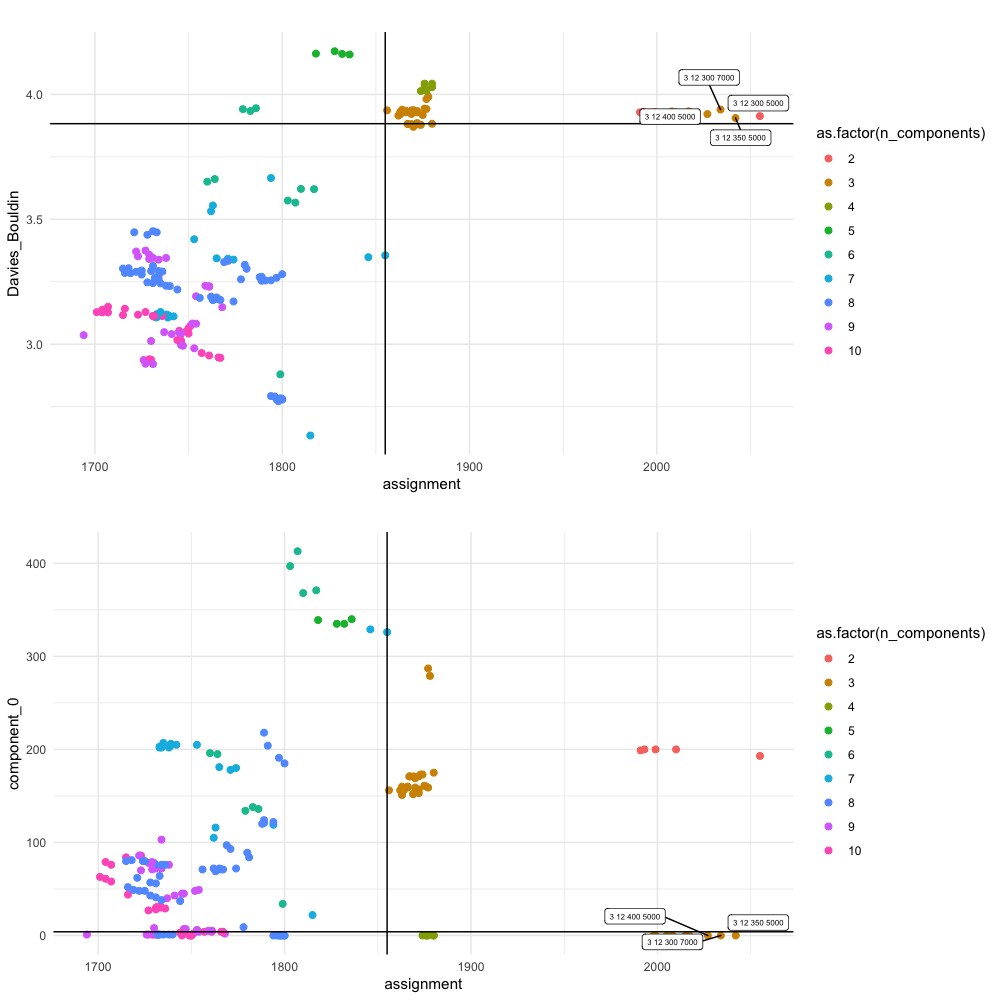

In [110]:
# plot the results of the gridsearch

set_notebook_plot_size(10, 10)

# add labels
result_table_S_DB <- result_table[result_table$assignment > 2020 & result_table$Davies_Bouldin > 3.883,]
result_table_S_DB$good <- ifelse(result_table_S_DB$assignment > 2020 & result_table_S_DB$Davies_Bouldin > 3.883, paste(result_table_S_DB$chains,result_table_S_DB$inicc,result_table_S_DB$n,result_table_S_DB$burnin),'')

result_table_A_0 <- result_table[result_table$assignment > 2020 & result_table$component_0 < 4,]
result_table_A_0$good <- ifelse(result_table_A_0$assignment > 2020 & result_table_A_0$component_0 < 4, paste(result_table_A_0$chains,result_table_A_0$inicc,result_table_A_0$n,result_table_A_0$burnin),'')

g1 <- ggplot(result_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 3.883) + #we want higher than 3rd quart
        geom_vline(xintercept = 1855) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=result_table_S_DB)

g2 <- ggplot(result_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 4) + #we want lower than 1st quart
        geom_vline(xintercept = 1855) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=result_table_A_0)

grid.arrange(g1, g2, ncol = 1)


ERROR: Error: Don't know how to add g1 to a plot


##### Clustering when translocations are included

In [112]:
df_w_transloc <- read.table("../../../data/updated_dataset/merge_gene_w_transloc_updated.csv",sep = ',' , header = T)
rownames(df_w_transloc)<- df_w_transloc$X
df_w_transloc <- df_w_transloc[,-1]
head(df_w_transloc)

,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,CBL,CDKN2A,CEBPA_bi,CEBPA_mono,CNTN5,CREBBP,CSF1R,CSF3R,CTCF,CUL2,CUX1,DNMT3A,EED,ETV6,EZH2,FBXW7,FLT3_ITD,FLT3_TKD,FLT3_other,GATA1,GATA2,GNAS,GNB1,IDH1,IDH2_p.R140,IDH2_p.R172,JAK2,JAK3,KANSL1,KDM6A,KIT,KMT2C,KMT2D,KMT2E,KRAS,LUC7L2,MED12,MLL,MPL,MYC,NF1,NFE2,NOTCH1,NPM1,NRAS_other,NRAS_p.G12_13,NRAS_p.Q61_62,PDS5B,PHF6,PPFIA2,PRPF8,PTEN,PTPN11,PTPRF,PTPRT,RAD21,RIT1,RUNX1,S100B,SETBP1,SF1,SF3B1,SMC1A,SMC3,SMG1,SPP1,SRSF2,STAG2,STAT5B,SUZ12,TET2,TP53,U2AF1,WT1,ZRSR2,gender,t_v_11,add_10p,add_10q,add_11p,add_11q,add_12p,add_12q,add_13p,add_13q,add_14p,add_14q,add_15p,add_15q,add_16p,add_16q,add_17p,⋯,t_13_19,t_15_16,t_15_17,t_16_17,t_16_21,t_17_18,t_17_19,t_17_20,t_17_21,t_17_22,t_19_22,t_1_12,t_1_14,t_1_15,t_1_16,t_1_17,t_1_19,t_1_2,t_1_21,t_1_22,t_1_3,t_1_4,t_1_5,t_1_6,t_1_8,t_1_9,t_2_12,t_2_17,t_2_21,t_2_3,t_2_5,t_2_7,t_2_8,t_2_9,t_3_14,t_3_16,t_3_19,t_3_21,t_3_4,t_3_5,t_3_6,t_3_7,t_3_9,t_4_10,t_4_12,t_4_13,t_4_15,t_4_17,t_4_19,t_4_21,t_4_5,t_4_6,t_4_8,t_4_9,t_5_10,t_5_12,t_5_13,t_5_15,t_5_17,t_5_21,t_5_7,t_5_8,t_5_9,t_6_10,t_6_16,t_6_17,t_6_22,t_6_7,t_6_9,t_7_12,t_7_14,t_7_16,t_7_17,t_7_8,t_8_10,t_8_13,t_8_14,t_8_16,t_8_17,t_8_19,t_8_20,t_8_21,t_8_9,t_9_10,t_9_11,t_9_12,t_9_13,t_9_15,t_9_17,t_9_21,t_9_22,t_x_1,t_x_12,t_x_15,t_x_16,t_x_21,t_x_5,t_x_y,wholedup,complex
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
